<a href="https://colab.research.google.com/github/shuan88/cv110_hw3/blob/main/cv_110_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/shuan88/cv110_hw3.git
%cd /content/cv110_hw3

Cloning into 'cv110_hw3'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 18 (delta 2), reused 18 (delta 2), pack-reused 0
Unpacking objects: 100% (18/18), done.
/content/cv110_hw3


In [ ]:
# ! git pull

remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 1), reused 6 (delta 1), pack-reused 0
Unpacking objects: 100% (6/6), done.
From https://github.com/shuan88/cv110_hw3
   7db8c79..e7262b3  main       -> origin/main
Updating 7db8c79..e7262b3
Fast-forward
 .DS_Store | Bin 6148 -> 6148 bytes
 img/1.jpg | Bin 0 -> 85447 bytes
 img/4.png | Bin 0 -> 506121 bytes
 3 files changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 img/1.jpg
 create mode 100644 img/4.png


# Basic

In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

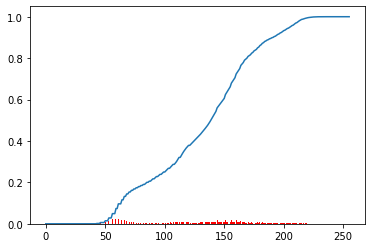

In [7]:
def get_pdf_cdf(data):
    PDF = np.zeros(256 , dtype=int)
    CDF = np.zeros(256 , dtype=float)
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            PDF[data[i,j]] += 1
    CDF[0] = PDF[0]
    for i in range(1,CDF.shape[0]):
        CDF[i] = CDF[i-1] + PDF[i]
    return PDF,CDF

    
# img = cv2.imread("img/4.png" ,0 )
img = cv2.imread("img/lena.png" , 0 )
# img = cv2.imread("img/img1.jpg" , 0 )
img_PDF,img_CDF = get_pdf_cdf(img)
CDF_01= img_CDF/img_PDF.sum()

plt.bar(range(256),img_PDF/(img_PDF.sum()) , color ='r')
plt.plot(img_CDF/img_PDF.sum())
plt.show()

## Show hist

## transform_function

https://en.wikipedia.org/wiki/Histogram_equalization

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/49e7d6c2a0e08b6c363dc7df0c4acd6629d8e150)

where $cdf_{min}$ is the minimum non-zero value of the cumulative distribution function (in this case 1), $M × N$ gives the image's number of pixels (for the example above 64, where M is width and N the height) and L is the number of grey levels used (in most cases, like this one, 256).


## trainsform

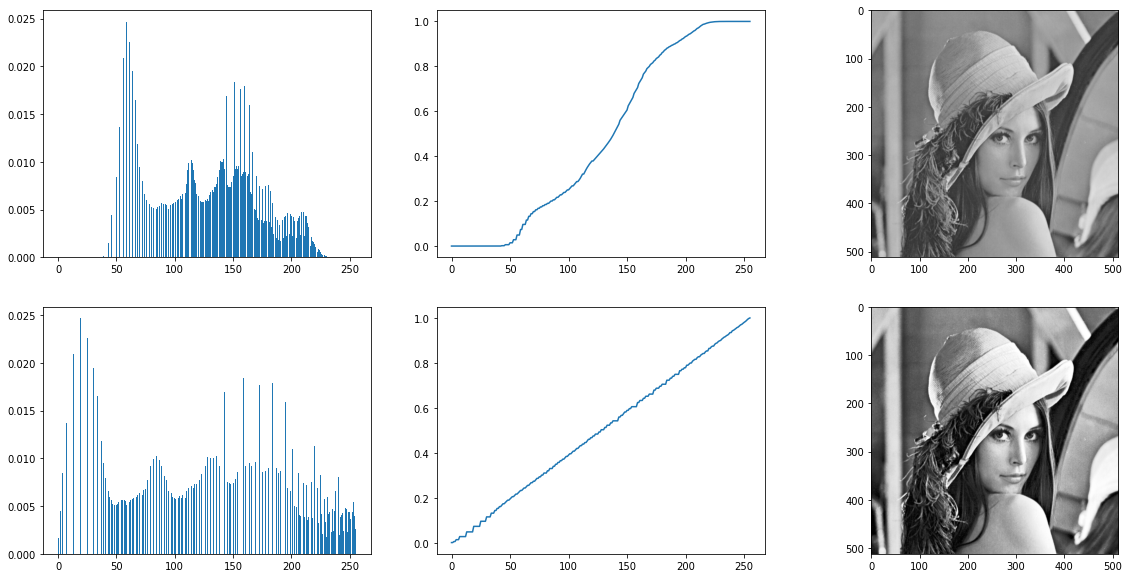

In [8]:
# new_img
# img = cv2.imread("img/img1.jpg" , 0 )
# img = cv2.imread("img/lena.png" , 0 )
new_img = np.zeros_like(img)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        # new_img[i,j] = X[img[i,j]]
        new_img[i,j] = int(np.round(CDF_01[img[i,j]] * 255)) # 重新取樣
# cv2_imshow(new_img)

img_PDF,img_CDF = get_pdf_cdf(img)
new_img_PDF,new_img_CDF = get_pdf_cdf(new_img)

plt.subplots(figsize=(20,10))
plt.subplot(2, 3, 1)
plt.bar(range(256),img_PDF/img_PDF.sum())

plt.subplot(2, 3, 2)
plt.plot(img_CDF/img_PDF.sum())

plt.subplot(2 , 3, 3)
plt.imshow(cv2.cvtColor(img , cv2.COLOR_BGR2RGB))

plt.subplot(2, 3, 4)
plt.bar(range(256),new_img_PDF/new_img_PDF.sum())
plt.subplot(2, 3, 5)
plt.plot(new_img_CDF/new_img_PDF.sum())

plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(new_img , cv2.COLOR_BGR2RGB))

plt.show()

# Color

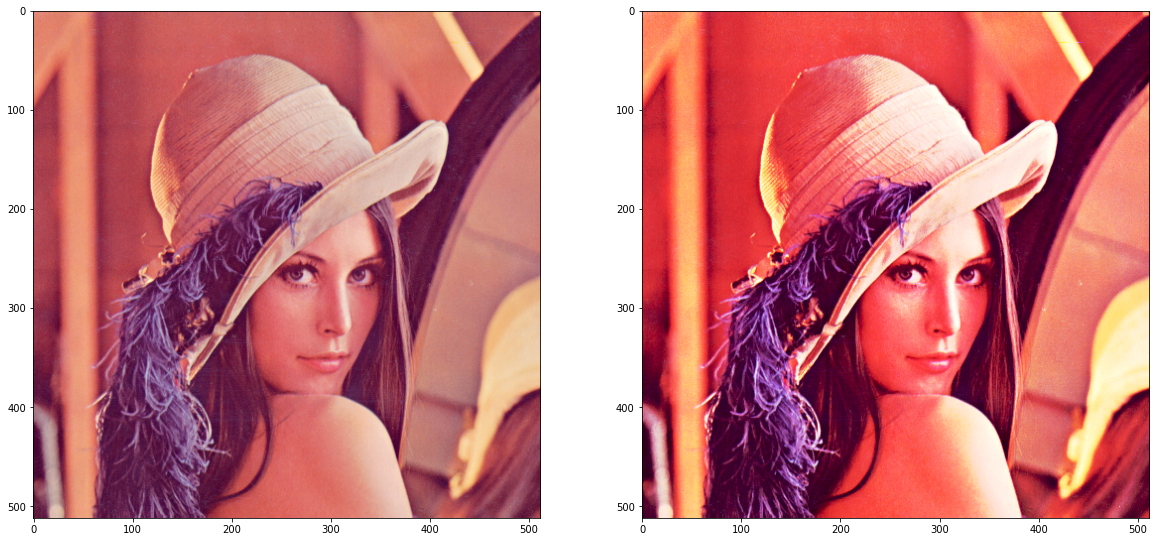

In [14]:
img_color = cv2.imread("img/lena.png")
# img = cv2.imread("img/4.png")
new_img = np.zeros_like(img_color)
img_PDF,img_CDF = get_pdf_cdf(cv2.cvtColor(img_color , cv2.COLOR_BGR2GRAY))
CDF_01= img_CDF/img_PDF.sum()

for color in range(img_color.shape[-1]):
    for i in range(img_color.shape[0]):
        for j in range(img_color.shape[1]):
            # new_img[i,j] = X[img[i,j]]
            new_img[i,j,color] = int(np.round(CDF_01[img_color[i,j,color]] * 255))

plt.subplots(figsize=(20,15))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_color , cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(new_img , cv2.COLOR_BGR2RGB))

plt.show()

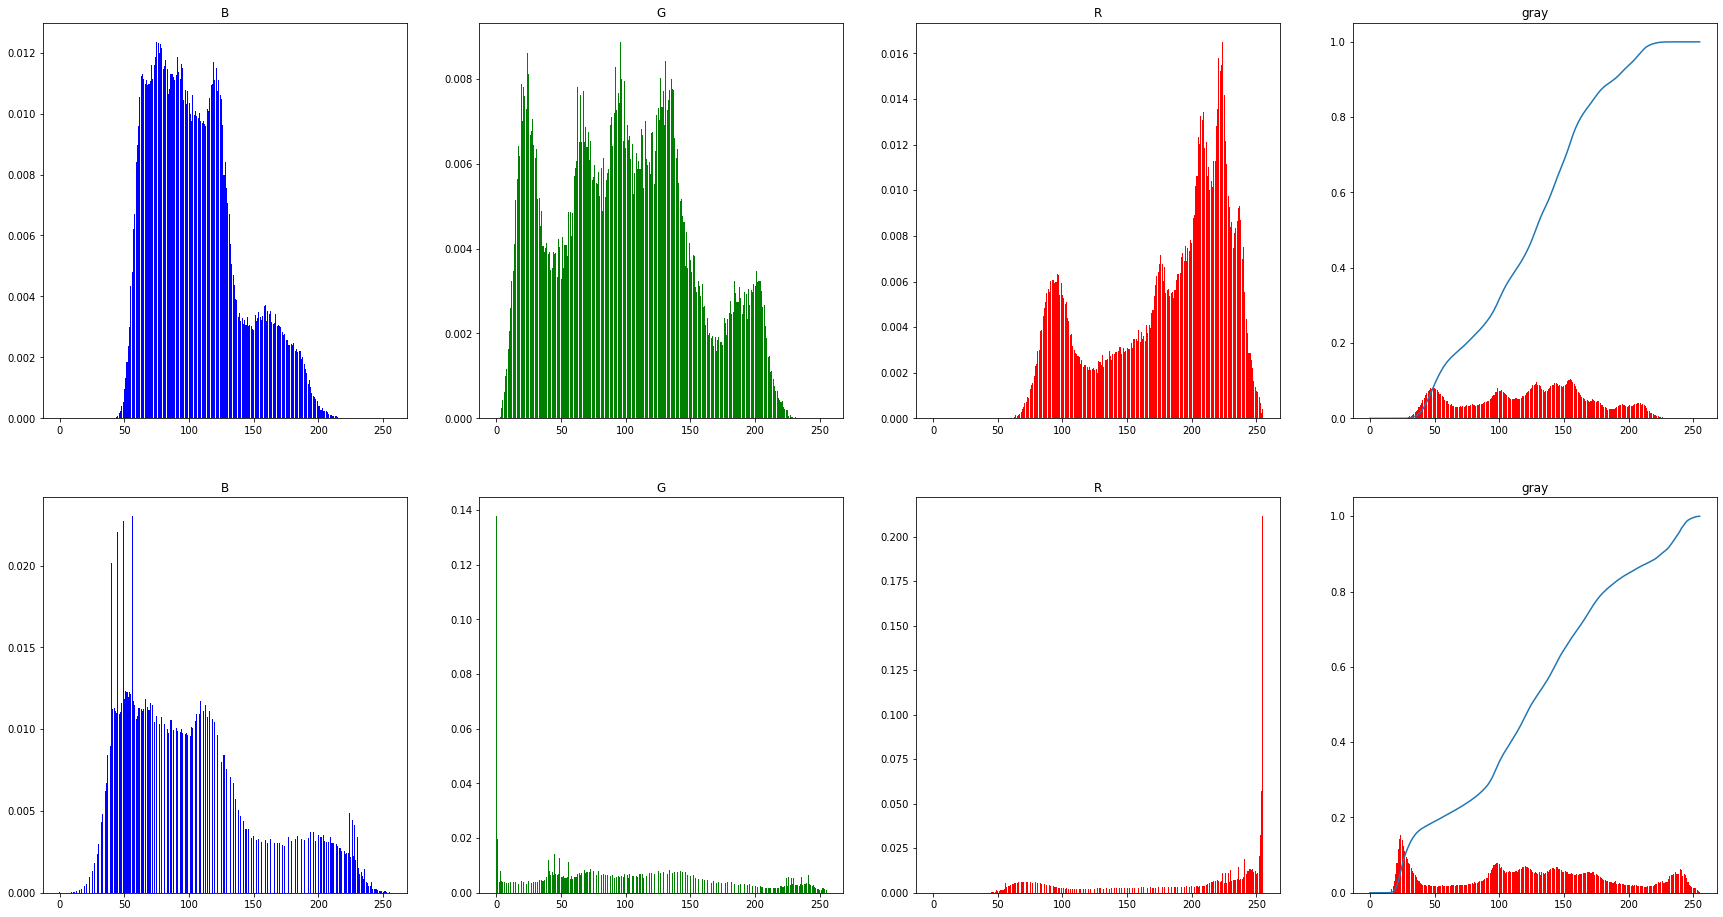

In [15]:
plt.subplots(figsize=(30,16))
color_lable = ["B",'G',"R"]
for i in range(img_color.shape[-1]):
    img_PDF,img_CDF = get_pdf_cdf(img_color[:,:,i])
    plt.subplot(2, 4, 1+i)
    plt.bar(range(256),img_PDF/img_PDF.sum() , color = color_lable[i])
    plt.title(color_lable[i])

    img_PDF,img_CDF = get_pdf_cdf(new_img[:,:,i])
    plt.subplot(2, 4, 5+i)
    plt.bar(range(256),img_PDF/img_PDF.sum() , color = color_lable[i])
    plt.title(color_lable[i])

img_PDF,img_CDF = get_pdf_cdf(cv2.cvtColor(img_color , cv2.COLOR_BGR2GRAY))

plt.subplot(2, 4, 4)
plt.bar(range(256),img_PDF/(img_PDF.sum()//10),color = 'r')
plt.plot(img_CDF/img_PDF.sum())
plt.title('gray')

img_PDF,img_CDF = get_pdf_cdf(cv2.cvtColor(new_img , cv2.COLOR_BGR2GRAY))
plt.subplot(2, 4, 8)
plt.bar(range(256),img_PDF/(img_PDF.sum()//10),color = 'r')
plt.plot(img_CDF/img_PDF.sum())
plt.title('gray')

plt.show()